# Breast Cancer Tumor Detection using KNN Algorithm

Consider The Wisconsin Breast Cancer Database. 

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. 

Benign tumors do not spread to other parts while the malignant tumor is cancerous. 

# Problem Statement:

# Model the KNN classifier using the Breast Cancer data for predicting whether a patient is suffering from the benign tumor or malignant tumor.

KNN Model for Cancerous tumor detection:

To diagnose Breast Cancer, the doctor uses his experience by analyzing details provided by

1. Patient’s Past Medical History
2. Reports of all the tests performed.

Using the modeled KNN classifier, we will solve the problem in a way similar to the procedure used by doctors. 

The modeled KNN classifier will compare the new patient’s test reports, observation metrics with the records of patients(training data) that correctly classified as benign or malignant.

In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline 

Step1: input data : import pandas as pd
Step2: Split input data into train and test data subsets : from sklearn.model_selection import train_test_split
Step3: We normalize train data and test data : from scipy.stats import zscore
Step4: Build KNN algorithm with default number of neighbors : from sklearn.neighbors import KNeighborsClassifier
Step5: We calculate performance of KNN on train data and test data : from sklearn.metrics import accuracy_score
Step6: Find the optimal number of neighbors our KNN model
Step7: Agin KNN with optimal of number of neights(found in Step6) and compare train and test performances with Step 5 model
Step8: Signoff 

In [7]:
bc_df = pd.read_csv("wisc_bc_data.csv")

In [8]:
bc_df.shape

(569, 32)

In [9]:
bc_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [7]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [11]:
bc_df.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [61]:
bc_df.groupby(["diagnosis"]).count()

# Class distribution among B and M is nearly 2:1. The model will better predict B than M

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [15]:
bc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


drop the first column from the data frame. This is Id column which is not used in modeling

In [12]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.
bc_df = bc_df.drop(labels = "id", axis = 1)

In [21]:
bc_df.columns.drop('diagnosis')

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

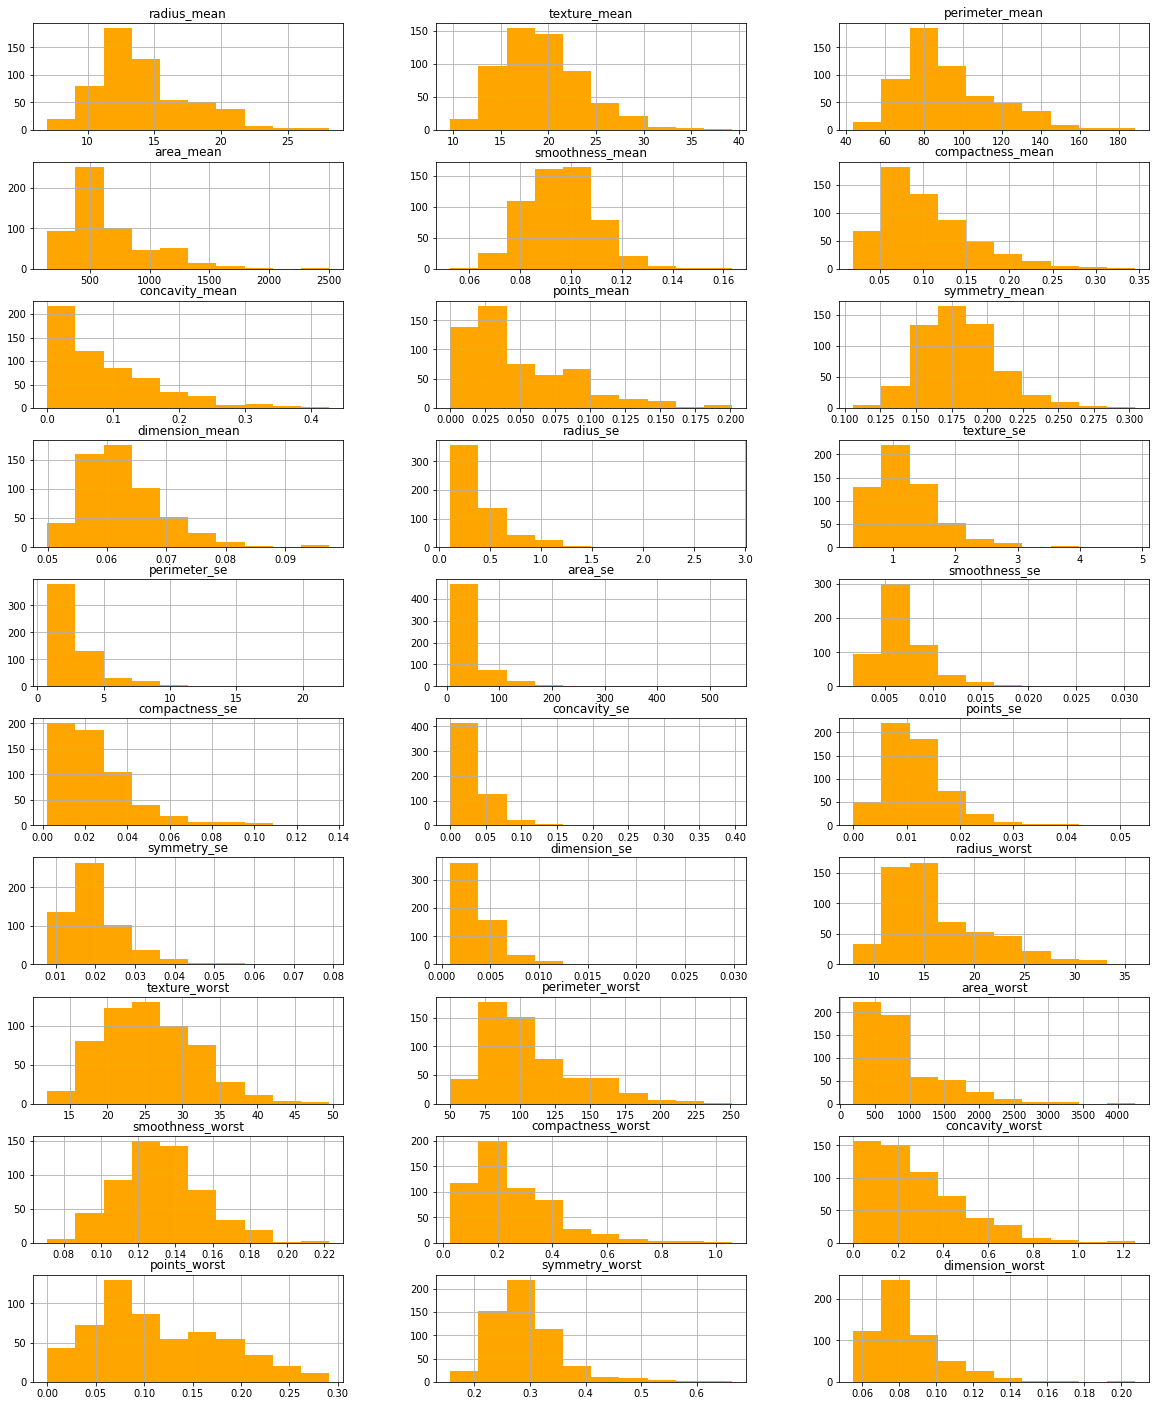

In [38]:
fig, ax = plt.subplots(10,3, figsize=(20,25))
for col,subplot in zip(bc_df.columns.drop('diagnosis'), ax.flatten()):
    bc_df.hist(col, ax=subplot, color='orange')
plt.show()

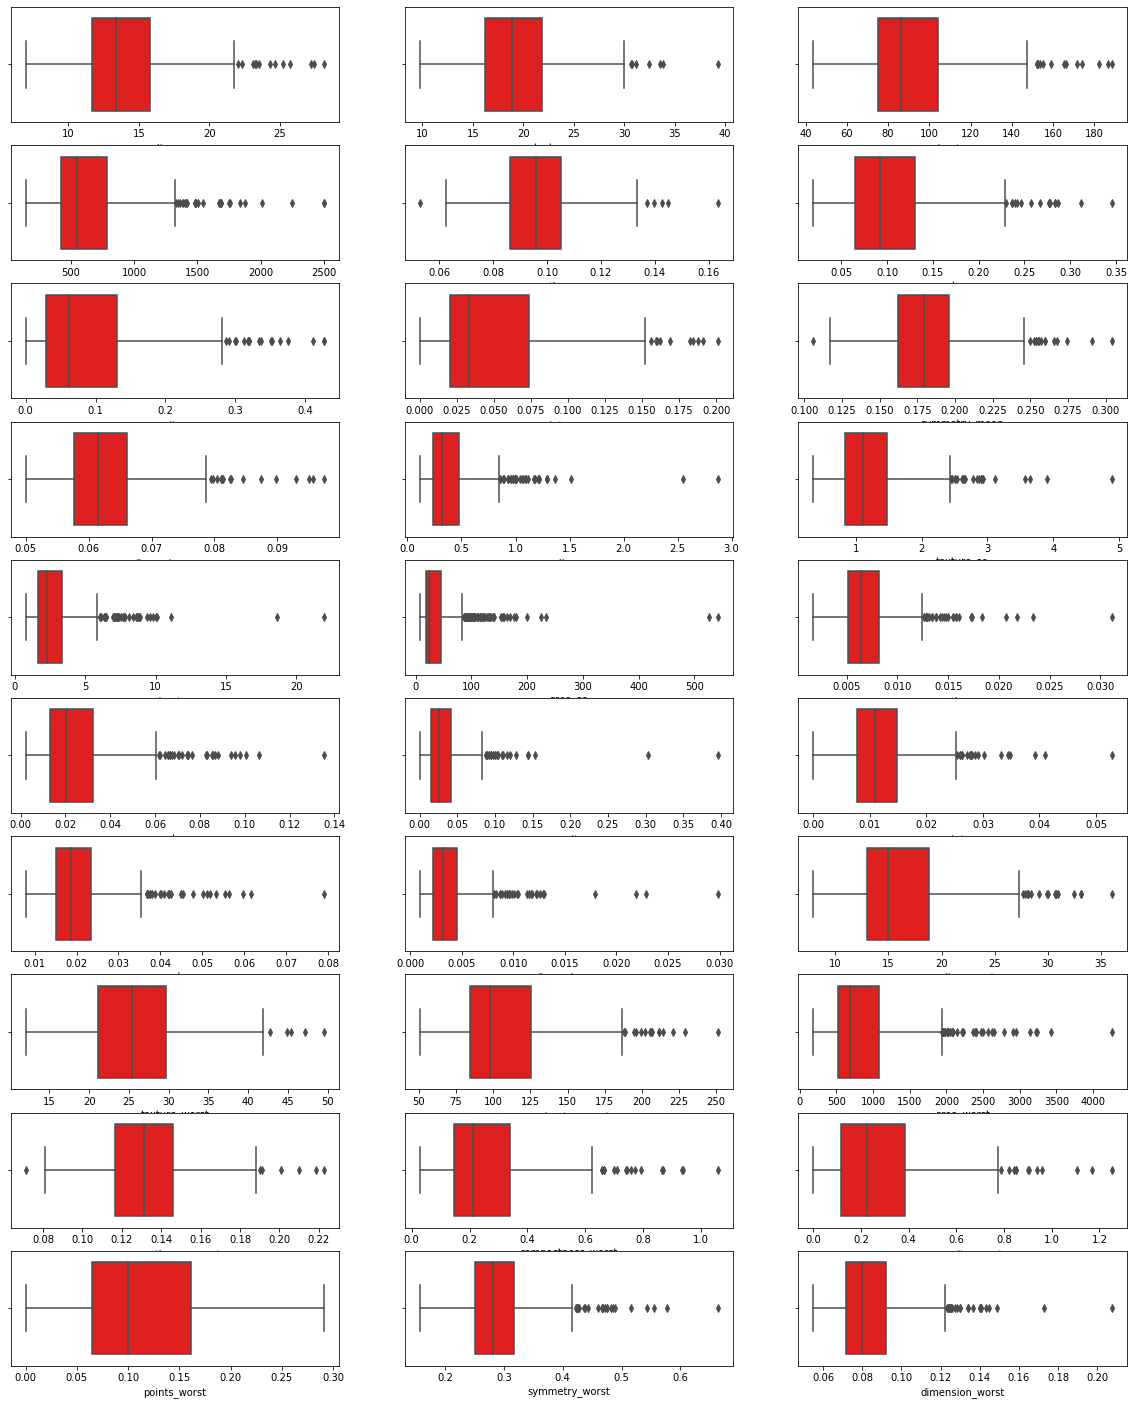

In [50]:
fig, ax = plt.subplots(10,3, figsize=(20,25))
for col,subplot in zip(bc_df.columns.drop('diagnosis'), ax.flatten()):
    sns.boxplot(col, data= bc_df, ax=subplot, color='red')
plt.show()

- There are lot of outliers in all the columns
- We will not impute the outliers as the datpoints are few

In [58]:
bc_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

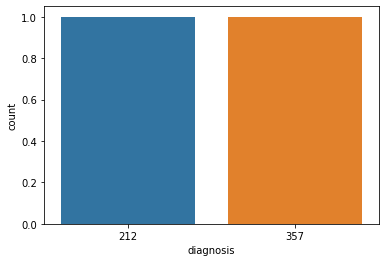

In [60]:
sns.countplot(bc_df.diagnosis.value_counts())
plt.show()

Next step: separate bc_df into X(feature set) and y(target variable)

In [51]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = bc_df.drop(labels= "diagnosis" , axis = 1)

In [52]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

X = X.apply(zscore)  # convert all attributes to Z scale 

In [56]:
X.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
218,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
366,1.009020,0.337507,1.047507,0.878290,1.077425,1.178005,1.214074,1.456866,0.581892,-0.161268,...,0.869914,-0.092369,0.763673,0.740814,0.413434,0.607736,0.413122,0.561767,-0.708193,-0.363850
98,-1.121087,-0.409482,-1.105917,-0.972083,0.693131,-0.366161,-0.892901,-0.767865,0.359185,0.890594,...,-1.055953,-0.462024,-1.052072,-0.887716,0.360831,-0.701440,-0.990537,-0.896180,0.249533,0.223003
173,-0.152598,0.593484,-0.198085,-0.267030,-1.195599,-0.412213,-0.603634,-0.709312,-0.644825,-0.596472,...,-0.304244,0.710451,-0.285980,-0.385129,-1.396988,-0.516959,-0.608750,-0.802689,-0.735695,-0.759519
444,0.946536,4.651889,0.882746,0.755709,0.125231,0.482486,0.664167,1.010888,-0.009560,-0.444789,...,1.292363,3.125425,1.010895,0.927153,0.181104,0.758501,0.249047,1.400752,-0.077258,0.056202


In [53]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 
y = bc_df[["diagnosis"]]

In [65]:
y.sample(5)

,diagnosis
253,M
479,M
126,M
243,M
524,B


In [66]:
y.head(5)

,diagnosis
0,B
1,B
2,B
3,B
4,B


In [67]:
y = pd.get_dummies(y, drop_first=True)

label_econdings: (B, M, CanNotSay) -> (0, 1, 2)
get_dummies : (B, M, CanNotSay)
B | M | CanNotSay

In [68]:
y.head(10)

,diagnosis_M
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [69]:
type(y)

pandas.core.frame.DataFrame

In [74]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=test_size, random_state=seed)

In [82]:
X_train.shape, y_train.shape

((398, 30), (398,))

In [83]:
X_test.shape, y_train.shape

((171, 30), (398,))

In [88]:
y_train[0:5]

array([1, 1, 1, 0, 0], dtype=uint8)

In [90]:
y_test[0:5]

array([0, 0, 1, 1, 1], dtype=uint8)

In [75]:
NNH = KNeighborsClassifier()

In [76]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
NNH.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [91]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels = NNH.predict(X_test)

In [92]:
NNH.score(X_train, y_train)

0.9773869346733668

In [93]:
NNH.score(X_test, y_test)

0.9649122807017544

In [95]:
# Train Confusion matrix
confusion_matrix(y_train, NNH.predict(X_train))

array([[248,   0],
       [  9, 141]], dtype=int64)

In [96]:
# Test Confusion matrix
confusion_matrix(y_test, predicted_labels)

array([[108,   1],
       [  5,  57]], dtype=int64)

### Putting all steps together

In [97]:
X = bc_df.drop(labels= "diagnosis" , axis = 1)
X = X.apply(zscore)  # convert all attributes to Z scale 
y = bc_df[["diagnosis"]]
y = pd.get_dummies(y, drop_first=True)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=test_size, random_state=seed)
NNH = KNeighborsClassifier()
NNH.fit(X_train, y_train) ## Training the model
print(("Train accuracy: ", NNH.score(X_train, y_train))) ## Train accuracy
print(("Test accuracy: ", NNH.score(X_test, y_test)))

('Train accuracy: ', 0.9773869346733668)
('Test accuracy: ', 0.9649122807017544)


### Finding Optimal k

In [99]:
X_train.shape[0]

398

In [100]:
int(np.sqrt(X_train.shape[0]))

19

In [101]:
maxK = int(np.sqrt(X_train.shape[0]))

In [102]:
optimalK = 1
optimalTrainAccuracy = 0

In [103]:
for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        NNH = KNeighborsClassifier(n_neighbors=k_i)
        NNH.fit(X_train, y_train)
        if(NNH.score(X_train, y_train) > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = NNH.score(X_train, y_train)
print((optimalK, optimalTrainAccuracy))

(3, 0.9849246231155779)


In [105]:
NNH = KNeighborsClassifier(n_neighbors=3)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [106]:
NNH.score(X_train, y_train)

0.9849246231155779

In [107]:
NNH.score(X_test, y_test)

0.9649122807017544

In [54]:
# Test Confusion matrix
metrics.confusion_matrix(y_test, NNH.predict(X_test))

array([[107,   2],
       [  7,  55]], dtype=int64)

- The KNN model is performing well with good train and test acuracy. The model s not an overfit model